In [55]:
import scipy.io.wavfile, scipy.signal, sounddevice
import matplotlib.pyplot as plt
import numpy as np
import itertools

plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 140

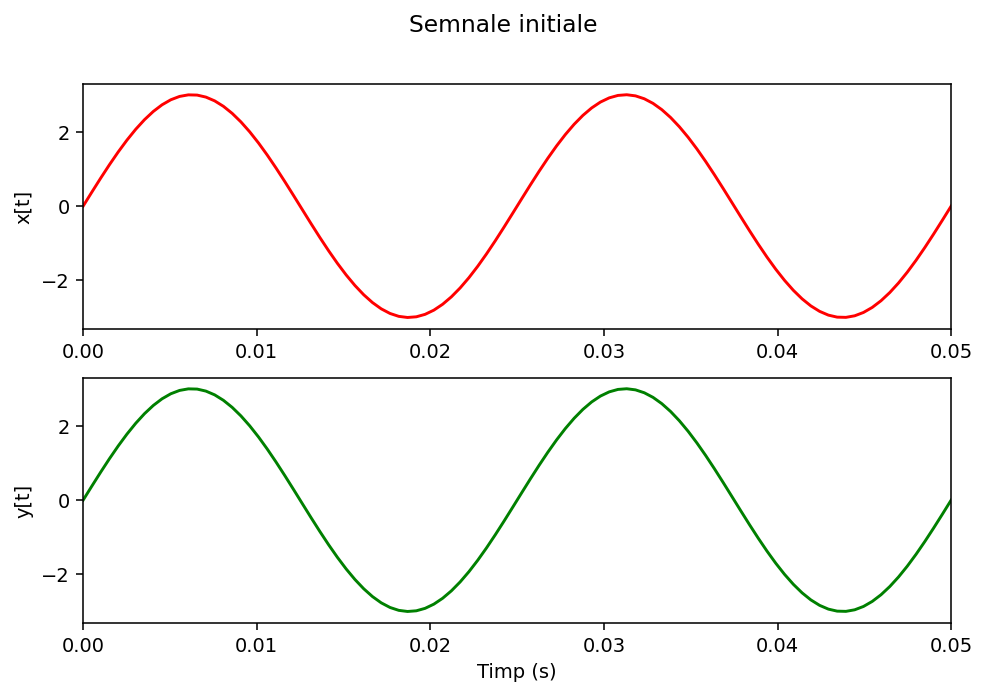

In [57]:
# 1
signal_sin = lambda t: 3 * np.sin(2 * np.pi * 40 * t)
signal_cos = lambda t: 3 * np.cos(2 * np.pi * 40 * t + 3 * np.pi / 2)

dreapta = 0.05
interval = np.linspace(0, dreapta, int(dreapta / 0.0005))
fig, axs = plt.subplots(2)
fig.suptitle("Semnale initiale")
axs[0].plot(interval, signal_sin(interval), color="red")
axs[1].plot(interval, signal_cos(interval), color="green")

axs[0].set_ylabel("x[t]")
axs[1].set_ylabel("y[t]")
axs[1].set_xlabel("Timp (s)")

for ax in axs:
    ax.set_xlim(0, dreapta)

plt.show()

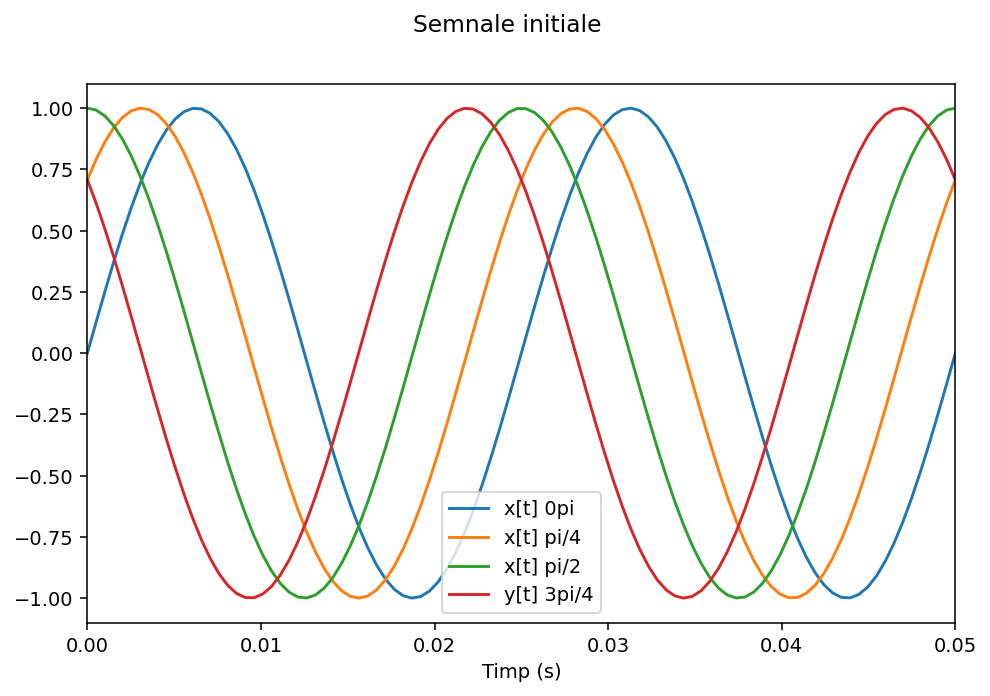

In [58]:
# 2
signal_0 = lambda t: np.sin(2 * np.pi * 40 * t)
signal_1 = lambda t: np.sin(2 * np.pi * 40 * t + np.pi / 4)
signal_2 = lambda t: np.sin(2 * np.pi * 40 * t + np.pi / 2)
signal_3 = lambda t: np.sin(2 * np.pi * 40 * t + 3 * np.pi / 4)
signals = [signal_0, signal_1, signal_2, signal_3]

dreapta = 0.05
interval = np.linspace(0, dreapta, int(dreapta / 0.0005))
fig, ax = plt.subplots()
fig.suptitle("Semnale initiale")
ax.plot(interval, signal_0(interval), label="x[t] 0pi")
ax.plot(interval, signal_1(interval), label="x[t] pi/4")
ax.plot(interval, signal_2(interval), label="x[t] pi/2")
ax.plot(interval, signal_3(interval), label="y[t] 3pi/4")


ax.set_xlabel("Timp (s)")

ax.set_xlim(0, dreapta)
ax.legend()

plt.show()

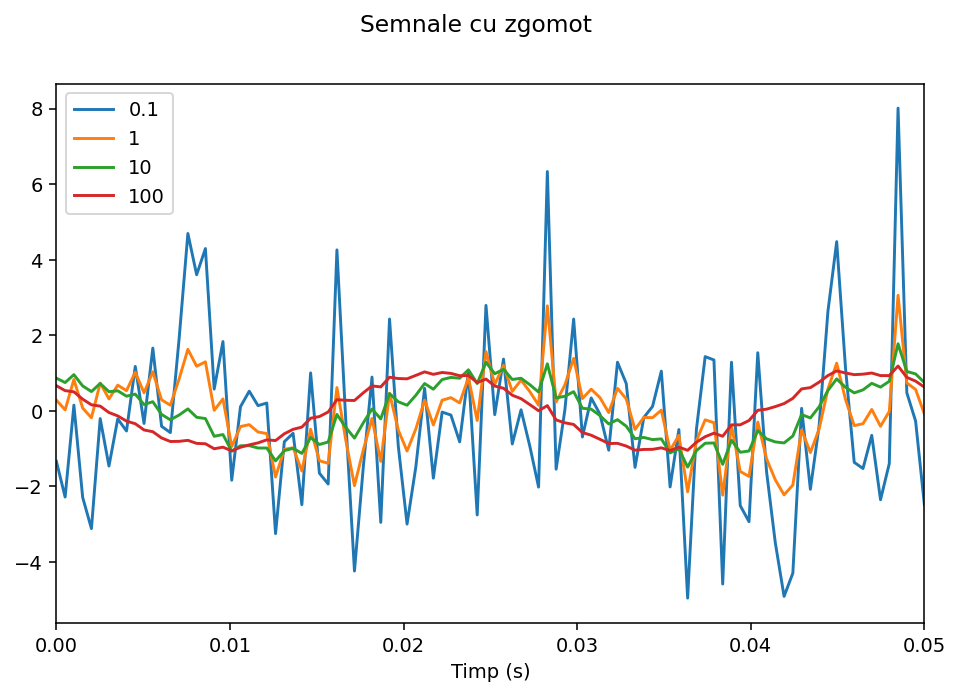

[2.3874762405851024, 0.7587897593702014, 0.24114715795844227, 0.07587897593702016]


In [62]:
noise = np.random.normal(0, 1, 100)
snr = [0.1, 1, 10, 100]

gammas = [
    np.sqrt(np.sum(signal(interval) ** 2) / (ratio * np.sum(noise**2)))
    for (ratio, signal) in itertools.zip_longest(snr, signals)
]

fig, ax = plt.subplots()
fig.suptitle("Semnale cu zgomot")
for i, (gamma, signal) in enumerate(itertools.zip_longest(gammas, signals)):
    ax.plot(
        interval,
        signal(interval) + gamma * noise,
        label=snr[i],
    )

ax.set_xlabel("Timp (s)")
ax.set_xlim(0, dreapta)
ax.legend()

plt.show()

print(gammas)